# Todo

- Finish writing Strong convergence proof
- Order of convergence Aurelien (why?)
- E(0) method
- Plot thing
- Start presentation

\begin{equation}
    S_n = E[\sup | \hat X^n_{t^n_i}- \hat X^{2n}_{t^{2n}_{2i}}|]
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import mc_mean
from solvers import cir_dereich, brownian_paths
from IPython.core.debugger import set_trace

In [43]:
k = 1
lamda = 1
T = 1
X_0 = 1
n = 200
M = 6000
# f = theta^2/2
# theta = sqrt(2f)

In [44]:
f_range = np.arange(0.2, 3.4, 0.2)

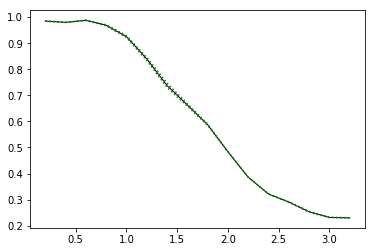

In [45]:
alphas = np.zeros((len(f_range), 3))
for i, f in enumerate(f_range):
    theta = np.sqrt(2*f)
    t, W = brownian_paths(T, 2*n, M)
    t_n, X_n = cir_dereich(k, lamda, theta, X_0, t[::2], W[:,::2])
    t_2n, X_2n = cir_dereich(k, lamda, theta, X_0, t, W)
    S_n = np.array(mc_mean(np.amax(np.abs(X_n - X_2n[:,::2]), axis=1), axis=0))


    t_10, W_10 = brownian_paths(T, 20*n, M)
    t_10n, X_10n = cir_dereich(k, lamda, theta, X_0, t_10[::2], W_10[:,::2])
    t_20n, X_20n = cir_dereich(k, lamda, theta, X_0, t_10, W_10)
    S_10n = np.array(mc_mean(np.amax(np.abs(X_10n - X_20n[:,::2]), axis=1), axis=0))

    alpha = np.log10(S_n) - np.log10(S_10n)
    alphas[i] = alpha

plt.plot(f_range, alphas[:,0], "k", linewidth=1)
plt.plot(f_range, alphas[:,1], "g:")
plt.plot(f_range, alphas[:,2], "g:")

In [69]:
theta = np.sqrt(2*2.2)
t, W = brownian_paths(T, 2*n, M)
t_n, X_n = cir_dereich(k, lamda, theta, X_0, t[::2], W[:,::2])
t_2n, X_2n = cir_dereich(k, lamda, theta, X_0, t, W)
S_n = np.array(mc_mean(np.amax(np.abs(X_n - X_2n[:,::2]), axis=1), axis=0))


t_10, W_10 = brownian_paths(T, 20*n, M)
t_10n, X_10n = cir_dereich(k, lamda, theta, X_0, t_10[::2], W_10[:,::2])
t_20n, X_20n = cir_dereich(k, lamda, theta, X_0, t_10, W_10)
S_10n = np.array(mc_mean(np.amax(np.abs(X_10n - X_20n[:,::2]), axis=1), axis=0))

alpha = np.log10(S_n) - np.log10(S_10n)

plt.plot(f, alpha[0], "ro")
plt.plot(f, alpha[1], "+")
plt.plot(f, alpha[2], "+")

RuntimeWarning: invalid value encountered in sqrt

In [72]:
k,lamda, theta

(1, 1, 2.0976176963403033)

In [73]:
2*k/lamda, theta**2

(2.0, 4.4)

In [78]:
t_n, X_n = cir_dereich(k, lamda, theta, X_0, t[::2], W[:,::2])

RuntimeWarning: invalid value encountered in sqrt

In [75]:
alpha = (4*k*lamda - theta**2)/8
beta = -k/2
gamma = theta/2

In [76]:
alpha

-0.050000000000000044